In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from typing import Any, Tuple, Union
import matplotlib.pyplot as plt

import xarray as xr
from pycocotools.coco import COCO
import netCDF4

from torch.utils.data import Dataset, DataLoader
from pathlib import Path

from utils import RANDOM_SEED, IMG_SIZE, REFERENCE_BAND, NORMALIZATION_DIV, BANDS, CROP_ENCODING, LINEAR_ENCODER

from patches_dataset import PatchesDataset

In [2]:
# Root path
root_path_coco = Path('data/') # Prefix path to coco files

# Path to coco file
coco_train = COCO(Path('data/coco_example.json'))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
print(list(sorted(coco_train.imgs.keys())))

[1]


In [4]:
# Dataset parameters
group_freq = '1MS'
prefix = 'pre_alpha_tests'
bands = sorted(['B02', 'B03', 'B04'])
compression = 'gzip'
save_medians = False # Toggle True to trade storage for loading time
window_len = 6
requires_norm = False
return_masks = False
clouds = False
cirrus = False
shadow = False
snow = False
output_size = (183, 183) # Return sub-patches of 183x183 size

In [5]:
# Create dataset instances
dataset_train = PatchesDataset(root_path_coco=root_path_coco,
                               coco=coco_train,
                               group_freq=group_freq,
                               compression=compression,
                               prefix=prefix,
                               bands=bands,
                               linear_encoder=LINEAR_ENCODER,
                               save_medians=save_medians,
                               window_len=window_len,
                               requires_norm=requires_norm,
                               return_masks=return_masks,
                               clouds=clouds,
                               cirrus=cirrus,
                               shadow=shadow,
                               snow=snow,
                               output_size=output_size
                              )

In [6]:
batch_size = 1
num_workers = 8

# Create dataloader instances
dataloader_train = DataLoader(dataset_train,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=num_workers,
                              pin_memory=True
                             )

In [7]:
for batch in dataloader_train:
    print(type(batch))
    
    medians = batch['medians']
    print(medians)
    print(medians.shape)
    print('')
    
    labels = batch['labels']    
    print(labels)
    print(labels.shape)
    
    break

<class 'dict'>
tensor([[[[[ 943.5000,  992.0000,  934.5000,  ...,  834.0000,  816.0000,
             846.0000],
           [1002.0000,  957.5000,  969.0000,  ...,  817.0000,  814.5000,
             839.0000],
           [ 983.5000,  976.0000,  961.5000,  ...,  823.0000,  839.0000,
             840.5000],
           ...,
           [ 798.5000,  789.0000,  797.5000,  ...,  891.0000,  868.0000,
             863.5000],
           [ 799.0000,  788.5000,  793.5000,  ...,  876.0000,  867.5000,
             925.0000],
           [ 793.0000,  789.5000,  792.5000,  ...,  896.0000,  869.5000,
             977.0000]],

          [[ 839.5000,  926.5000,  849.0000,  ...,  620.5000,  599.0000,
             621.0000],
           [ 888.5000,  857.5000,  859.5000,  ...,  618.5000,  604.0000,
             649.0000],
           [ 889.0000,  875.0000,  864.5000,  ...,  632.5000,  641.5000,
             657.0000],
           ...,
           [ 539.5000,  533.5000,  539.5000,  ...,  862.5000,  805.0000,
     

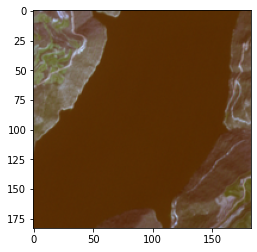

In [8]:
# Plot a subpatch
img = medians.cpu().detach().numpy()
img = img[0, 0]

img = img.transpose(1, 2, 0)

# Using current max, min for normalizing from [0, 1k] -> [0, 1]
# cause dividing by 1k, makes the image dark
img = (img - img.min()) * (1 / (img.max() - img.min()))

plt.imshow(img)
plt.show()

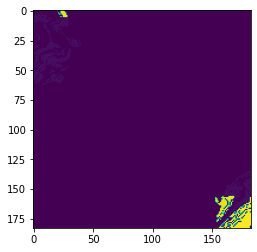

In [9]:
# And the labels
img = labels.cpu().detach().numpy()
img = img[0]

# Using current max, min for normalizing from [0, 1k] -> [0, 1]
# cause dividing by 1k, makes the image dark
img = (img - img.min()) * (1 / (img.max() - img.min()))

plt.imshow(img)
plt.show()